<a href="https://colab.research.google.com/github/Narennnnn/WalmartSalesAnalysis/blob/main/WalmartSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('Walmart Sales.xlsx')

In [3]:
df.shape

(1000, 12)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [6]:
#  get exact count of null values
pd.isnull(df).sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

Dataset do not contain any null values

In [7]:
# We can drop null values if there is any
df.dropna(inplace=True)

In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [10]:
# describe method returns description of the data in the DataFrame (i.e count, mean, std, etc)
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


Add Sales Column


In [11]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [12]:
df['Sales']=df['Unit price']*df['Quantity']
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1,65.82


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

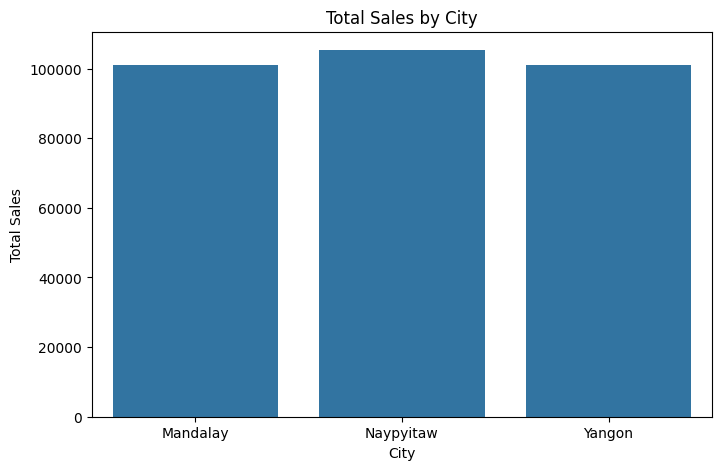

In [18]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Sales', data=city_sales)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

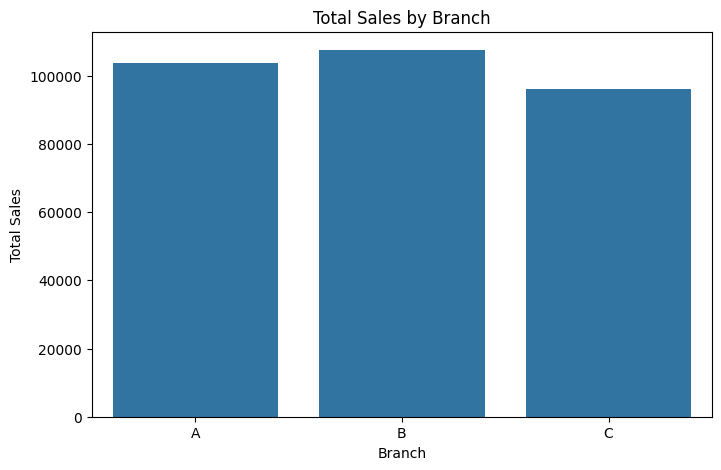

In [19]:
branch_sales = df.groupby('Branch')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Branch', y='Sales', data=branch_sales)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

In [21]:
revenue_data = df.groupby(['City', 'Branch'])['Sales'].sum().reset_index()
print(revenue_data)

        City Branch     Sales
0   Mandalay      A  34130.09
1   Mandalay      B  37215.93
2   Mandalay      C  29794.62
3  Naypyitaw      A  35985.64
4  Naypyitaw      B  35157.75
5  Naypyitaw      C  34160.14
6     Yangon      A  33647.27
7     Yangon      B  35193.51
8     Yangon      C  32302.43


In [23]:
# Average price of an item sold at each branch of the city
average_price_at_each_branch=df.groupby(['City','Branch'])['Unit price'].mean().reset_index()
print(average_price_at_each_branch)

        City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df['Month'] = df['Date'].dt.month


In [34]:
# total sales for each product line for each month
product_sales_monthly = df.groupby(['Month', 'Product line'])['Sales'].sum().reset_index()
print(product_sales_monthly)

    Month            Product line     Sales
0       1  Electronic accessories  17934.56
1       1     Fashion accessories  18423.92
2       1      Food and beverages  18638.60
3       1       Health and beauty  15603.02
4       1      Home and lifestyle  19518.80
5       1       Sports and travel  20635.26
6       2  Electronic accessories  16536.10
7       2     Fashion accessories  18104.63
8       2      Food and beverages  19047.96
9       2       Health and beauty  13906.91
10      2      Home and lifestyle  11842.27
11      2       Sports and travel  13152.01
12      3  Electronic accessories  17279.37
13      3     Fashion accessories  15191.35
14      3      Food and beverages  15784.72
15      3       Health and beauty  17341.25
16      3      Home and lifestyle  19935.99
17      3       Sports and travel  18710.66


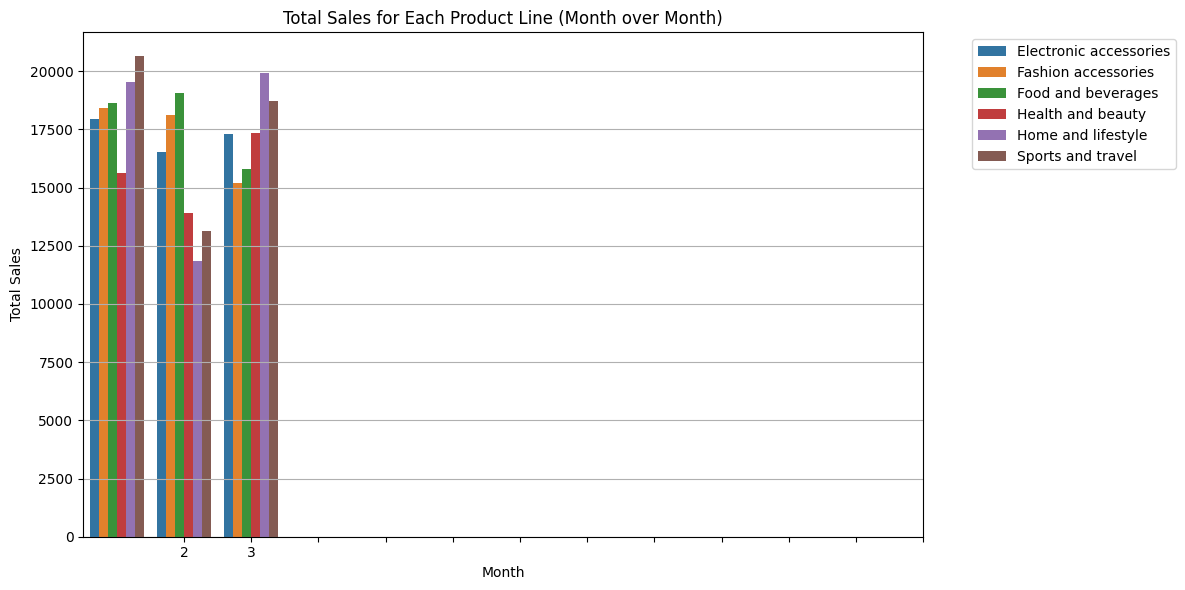

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales_monthly, x='Month', y='Sales', hue='Product line')
plt.title('Total Sales for Each Product Line (Month over Month)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
avaialable_months_data = df['Month'].unique()
print(avaialable_months_data)

[1 3 2]


We have only data available for 3 months only i.e Jan, Feb and March

In [41]:
# total sales for each Gender for each month
gender_sales_monthly = df.groupby(['Month', 'Gender'])['Sales'].sum().reset_index()
print(gender_sales_monthly)

   Month  Gender     Sales
0      1  Female  56322.84
1      1    Male  54431.32
2      2  Female  53652.91
3      2    Male  38936.97
4      3  Female  49912.75
5      3    Male  54330.59


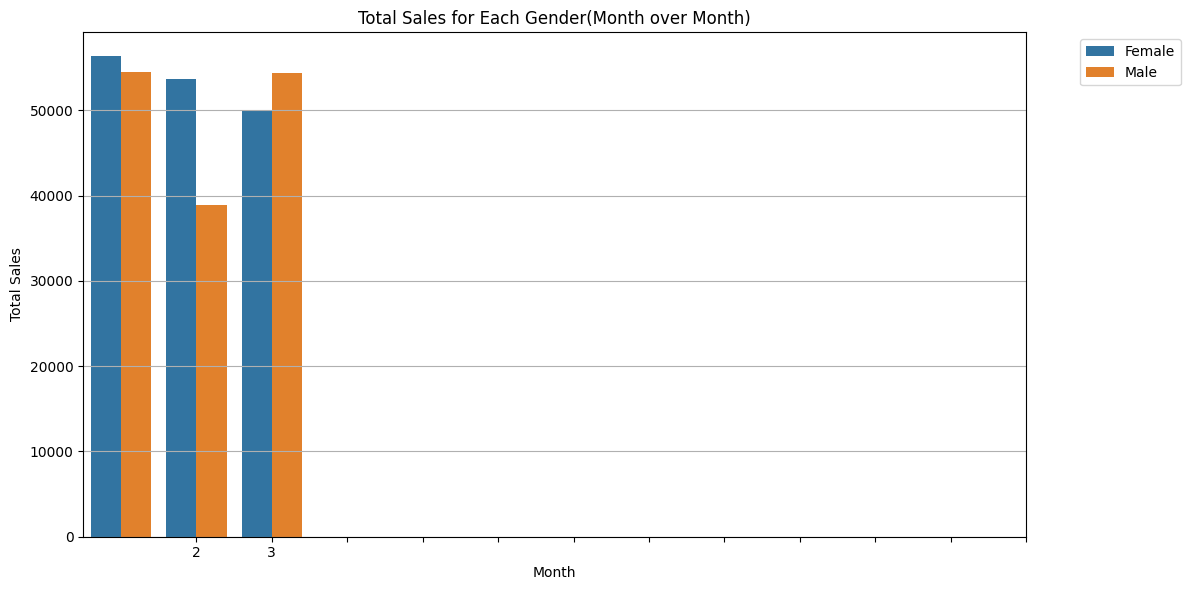

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_sales_monthly, x='Month', y='Sales', hue='Gender')
plt.title('Total Sales for Each Gender(Month over Month)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# total sales for each Payment method for each month
payment_sales_monthly = df.groupby(['Month', 'Payment'])['Sales'].sum().reset_index()
print(payment_sales_monthly)

   Month      Payment     Sales
0      1         Cash  39781.03
1      1  Credit card  36425.31
2      1      Ewallet  34547.82
3      2         Cash  34044.13
4      2  Credit card  29866.69
5      2      Ewallet  28679.06
6      3         Cash  33038.24
7      3  Credit card  29676.64
8      3      Ewallet  41528.46


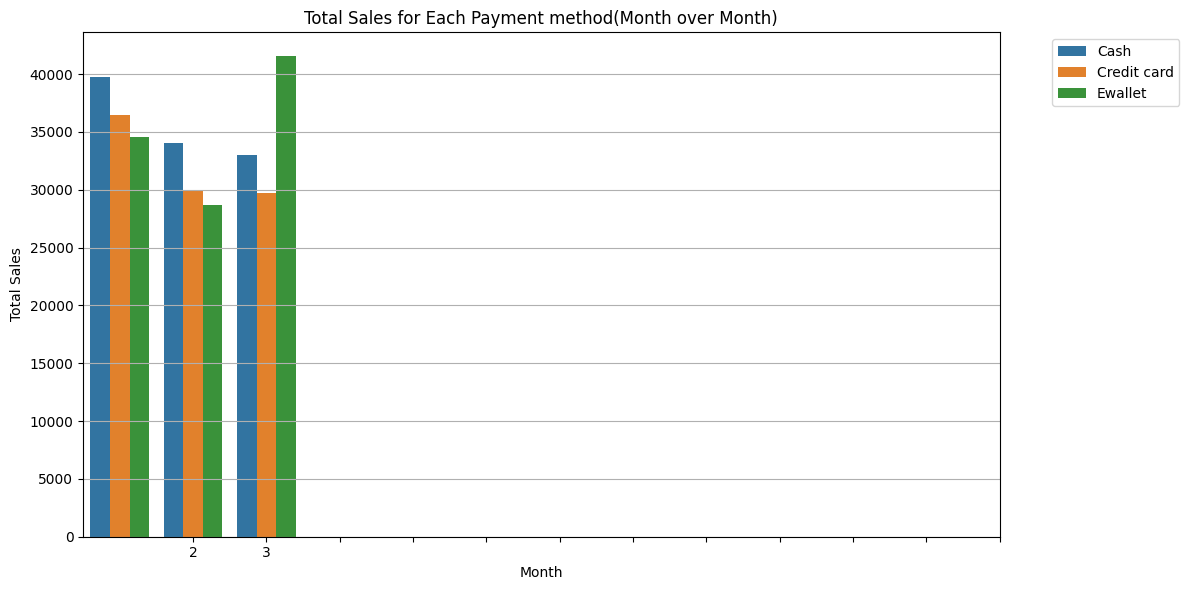

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_sales_monthly, x='Month', y='Sales', hue='Payment')
plt.title('Total Sales for Each Payment method(Month over Month)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()